###### This notebook will focus on how marketplace coverage and tax credits vary across states and relate to uninsured rates and Medicaid expansion.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/states_hic_cleaned.csv")
df.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,True,7755381.0,11843081,4087700.0,5829777


In [7]:
# Summarize Marketplace Health Insurance Coverage (2016) 

df = df[df["State"] != "United States"].copy()

# Ensure numeric
df["Marketplace Health Insurance Coverage (2016)"] = (
    df["Marketplace Health Insurance Coverage (2016)"].astype(float)
)

# Overall summary across states
mhic_summary = df["Marketplace Health Insurance Coverage (2016)"].describe()

mhic_stats = mhic_summary[["mean", "50%", "min", "max"]].rename({
    "mean": "Mean",
    "50%": "Median",
    "min": "Min",
    "max": "Max"
})
mhic_stats

Mean      2.172810e+05
Median    1.301780e+05
Min       1.331300e+04
Max       1.531714e+06
Name: Marketplace Health Insurance Coverage (2016), dtype: float64

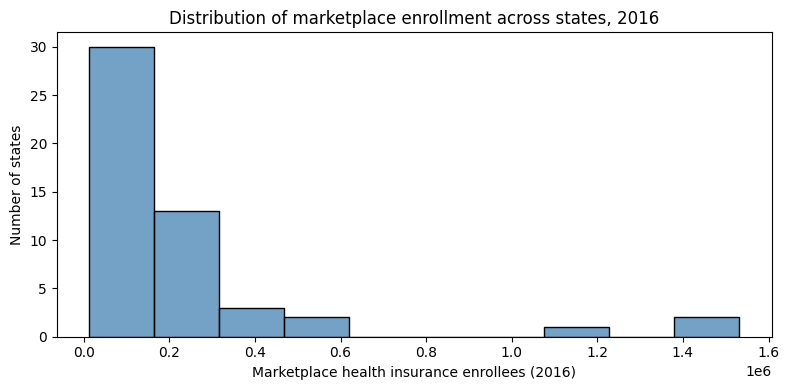

In [8]:
# Visualize distribution of marketplace enrollment across states 

plt.figure(figsize=(8, 4))
sns.histplot(
    data=df,
    x="Marketplace Health Insurance Coverage (2016)",
    bins=10,
    kde=False,
    color="steelblue"
)
plt.xlabel("Marketplace health insurance enrollees (2016)")
plt.ylabel("Number of states")
plt.title("Distribution of marketplace enrollment across states, 2016")
plt.tight_layout()
plt.show()

###### Marketplace enrollment is highly skewed, with most states having relatively modest enrollment and only a few very large states showing extremely high marketplace numbers. This suggests that national marketplace totals are driven disproportionately by a small set of populous states, so averages alone can be misleading without looking at the underlying distribution.​